<h1>Lab 2: Linear Regression : Training more Parameters</h1>

### Linear regression with 2 features (house area + bias term)
In this part, we will train a linear model for house price prediction using the house area and the bias term that represents the constant term (y-intercept) in the linear model equation $~Yhat=\theta_1 x+\theta_0$.

<h2>Preparation</h2>

We'll need the following libraries:

In [1]:
# These are the libraries we are going to use in the lab.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<h2 id="Makeup_Data">Load the Data</h2>

**Question 1:**
- Load the data from the *"house.csv"* file in "house_data" variable. 
- Print the size of the data.  

In [2]:
# Load the data
# Type your code here
house_data=np.loadtxt('house.csv') 

# Print the size of the data 
# Type your code here
print(house_data.shape)

(600, 3)


**Question 2:** 
- Determine the number of samples "m" in the input data "house_data".
- Extract the input feature and the output (what we are trying to predict) columns respectively in "X" and "Y" arrays.  
**Hint:** The shape of "X" and "Y" arrays should be (m,1) for the following questions and not (m,). You can use [newaxis numpy](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing) object to add a new axis as done in the question 1 of the first part.
- Determine the number of features "n" to be equal to the number of features.

In [3]:
# Extract the number of samples
# Type your code here
m = house_data.shape[0] 

#Extract the input feature X
# Type your code here
X = house_data[:,0,np.newaxis] # we add np.newaxis in the indexing to obtain an array 
print('The shape of X is : ',X.shape)                 # with shape (600,1) instead of (600,)
#Extract the output Y (what we are trying to predict)
# Type your code here
Y = house_data[:,2,np.newaxis] # we add np.newaxis in the indexing to obtain an array with shape (600,1) instead of (600,)
# number of features
# Type your code here
n = 1  

(600, 1)


Let us plot the data.

Text(0.5,1,'house area vs price')

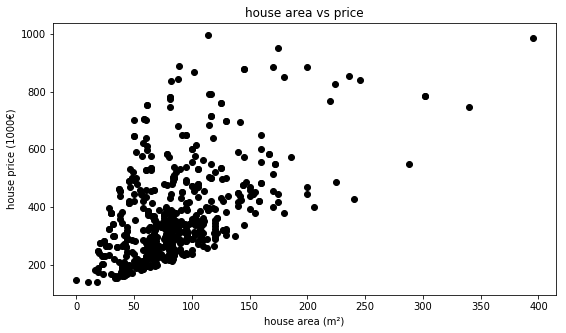

In [4]:
plt.figure("Visualize house data",figsize=(9,5))
plt.scatter(X, Y,  color='black')
plt.xlabel('house area (m²)')
plt.ylabel('house price (1000€)')
plt.title('house area vs price')

**Question 3: **
- Build the matrix X with shape (m,2) that represents 2 features: a column of ones that represents the bias term and a column of house area data.  
**Hint:** You could use numpy [concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) function (put two columns or array together).

In [5]:
# Type your code here
#X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
x1_mean=X.mean()
x1_std=X.std()

X = np.concatenate((np.ones((X.shape[0],1)),(X-X.mean())/X.std()),axis=1) # Normalized feature

<h3 id="Model_Cost">Create the Model and Cost Function</h3>

- Make all needed modifications in the functions if your implementation was not generalizable for any number of features n.

**Question 4:** 
Define the linear model with <code>predict</code> function that returns $yhat=\theta_1*x+\theta_0$.

In [6]:
# Create predict function
def predict(x,theta):
    # Type your code here
    return np.dot(x,theta)

**Question 4:** 
- Store in the variable m the number of samples.
- Define the criterion or cost function that returns the MSE (Mean Square Error): **Mean Squared Error (MSE)**: $$cost = \frac{1}{2~m} \sum_{i=1}^{m}{(yhat_i - y_i)^2}$$

In [7]:
# Create the MSE function to evaluate the result.

def cost(yhat, y):
    # Type your code here
    m = y.shape[0]
    return 1/(2*m)*np.sum((yhat-y)**2)

Let us define the learning rate <code>lr</code> and an empty list <code>LOSS</code> to record the loss for each iteration:  

In [8]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

Now, we initialize the model parameter to learn.

In [9]:
#theta_init=np.array([[250],[4.5]],dtype=float)
theta_init=np.array([[0],[-3]],dtype=float)

**Question 5:** 
- Store in the variable m the number of samples.
- Define the gradient of the cost function (Mean Squared Error) 
The gradient of the Mean Squared Error cost function is calculated as following: $$\frac{\partial cost(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(yhat_i - y_i)~x_j} ~~for~ j=0\dots n-1$$
**Hint:** You can use the vectorized form: $\frac{d (cost)}{d \theta} =\frac{1}{m} x^T(yhat-y)$

In [10]:
# Create the gradient of the Mean Squared Error cost function

def grad_cost_func(theta, x, y):
    # Type your code here
    m = x.shape[0]
    return (1/(m))*(np.dot(x.transpose(),(np.dot(x,theta)-y)))

<h3 id="Train">Train the Model</h3>

#### Gradient descent algorithm
The gradient descent algorithm is a downhill iterative optimization method that uses the gradient direction as descending direction on each step to reach a local minimum. For a convex function, such as the MSE cost function, the gradient descent is guaranteed to reach a global minimum.  
The update equation of the optimization parameter $\theta_j$ is given by: $$\theta_j=\theta_j-lr \frac{\partial cost(\theta_j)}{\partial \theta_j} ~~for~ j=0\dots n-1$$
Where $lr:$ represents the step or the learning rate.

**Question 6:** Define a function for training the model by the gradient descent method using the following steps:
- Make a prediction of your data
- Calculate the loss 
- Compute the gradient of the loss
- Update the $\theta$ parameters using the formula above.

In [11]:
# Define a function for train the model

def train_model(theta,iter):
    for epoch in range (iter):
        
        # make the prediction
        # Type your code here
        Yhat = predict(X,theta)
        
        # calculate the cost
        # Type your code here
        loss = cost(Yhat,Y)
        
        # store the loss into list
        LOSS.append(loss)
        
        # Compute gradient of the loss
        # Type your code here
        grad=grad_cost_func(theta, X, Y)
        
        # update the theta_1 parameter
        # Type your code here
        theta = theta - lr * grad
        
    return theta

**Question 7:** Run iterations of gradient descent and determine the optimal prediction of $\theta$

In [12]:
# Type your code here
theta_opt=train_model(theta_init,100)

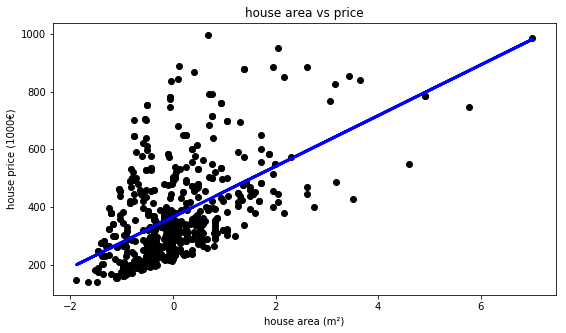

In [13]:

# plot linear model and data
plt.figure("Visualize house data",figsize=(9,5))
#plt.scatter(X[:,1], Y,  color='black')
plt.scatter((X[:,1]-X[:,1].mean())/X[:,1].std(), Y,  color='black')
plt.xlabel('house area (m²)')
plt.ylabel('house price (1000€)')
plt.title('house area vs price')
plt.plot(X[:,1],predict(X,theta_opt), color='blue', linewidth=3)

<font color="Green"><u>_**Observations:**_</u></font>   
- For unnormalized features, we note that the linear model passes from the origin even when we added the bias term. The problem is that the derivative of the cost function with respect to $\theta_1$ is much bigger than the derivative with respect to $\theta_0$. Hence, we are obliged to set the learning rate to a very small value (around $10^{-4}$) to ensure convergence. On the other hand, the update of $\theta_0$ will be very small since the derivative ($\frac{\partial J(\theta}{\partial \theta_0}$) and $lr$ are small so their product will be very small. Consequently, $\theta_0$ won't move a lot from its initial value.    

- For normalized features, we fix this problem by scaling all the features to become in the same range and their derivative would be comparable. Thus, we could set $lr$ to higher value like 0.3 or 1 without sacrificing the convergence. Consequently, gradient descent algorithm will converge faster and similarly on all the axes to the optimal value of $\theta$.

Text(11.625,0.5,'Cost')

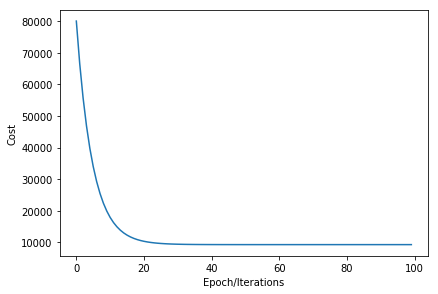

In [14]:
# Plot the variation of loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [15]:
print("The optimal value of theta that minimize cost function is: ",theta_opt)
print('The final loss is: ',LOSS[99])

The optimal value of theta that minimize cost function is:  [[364.9536394 ]
 [ 87.90226787]]
The final loss is:  9276.952792920527


Text(0.5,0,'Cost Funtion')

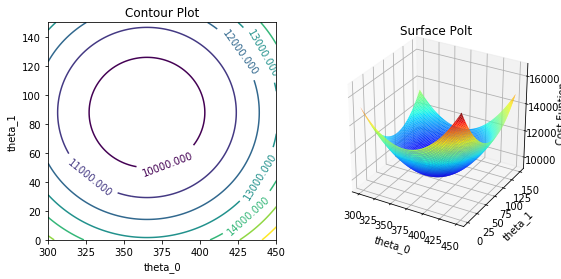

In [16]:
from mpl_toolkits.mplot3d.axes3d import*
from matplotlib import cm
from math import fabs

theta_0 = np.linspace(300,450,100) # you could also use: theta_0 = np.arange(300, 450, 2) 
theta_1 = np.linspace(0,150,100)   # you could also use: theta_1 = np.arange(0, 150, 2)

theta_0, theta_1 = np.meshgrid(theta_0, theta_1)

Theta=np.concatenate((theta_0[:,:,np.newaxis],theta_1[:,:,np.newaxis]),axis=-1)
Z =  1/(2*m)*np.sum((np.dot(Theta,X.transpose())-np.tile(Y[np.newaxis,np.newaxis,:,0],(*theta_0.shape,1)))**2,axis=-1)



fig=plt.figure('Contour and Surface Plots',figsize=(9,4))
ax = fig.add_subplot(1, 2, 1)
ctr = ax.contour(theta_0, theta_1, Z)
ax.clabel(ctr, inline=1, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')

ax=fig.add_subplot(1, 2, 2,projection='3d')
ax.plot_surface(theta_0,theta_1,Z,rstride=1,cstride=1,cmap=cm.jet,linewidth=1,antialiased=True)
ax.set_title('Surface Polt')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost Funtion')

<font color="Green"><u>_**Observations:**_</u></font>   
- For unnormalized feature, we note that the contour and surface plot are some flatten because the scale of house area (mean is about 100) is much bigger than the scale of bias term (equal 1). Hence, the derivative in the direction of theta_1 is much bigger than ($\times$100) in the direction of theta_0. Consequently the gradient direction is nearly vertical.
- For normalized feature, we note that the contour and surface plot are more circular and regular because the two features (normalized house area and bias term) have now comparable scale. Also, derivatives with respect to the two directions are comparable. Thus, the gradient direction point to the center of circles (minimum of cost function).

**Question 8: **
- Use the calculated "theta_opt" of estimate the price of a house with 330 m² area.  

We note that even with a bias term our model is still start from origin (0,0) and the bias weight $\theta_0$ is too small. This is because the values of second feature house area are big (the mean is about 100) compared to the bias feature (equals 1). Hence, the cost function is more sensible to the variation of $\theta_1$ (weight of house area feature) and then $\theta_0$ will not move a lot from its initial value (which is 0 in our case).

**Question 9: **
- Try the feature normalization technique on the house area feature to enhance the convergence of the model. You should modify the "X" matrix in the previous code block and re-execute the code. What do you notice?

In [17]:
area=np.array([1,330],dtype=float)
area[1]=(area[1]-x1_mean)/x1_std
print("The predicted price of a {0} m² house is: {1} k€".format(area[1],predict(area,theta_opt)[0]))

The predicted price of a 5.54766582827572 m² house is: 852.6060471057399 k€


### Linear regression with 3 features (house area + number of rooms + bias term)

In this part, we will train a linear model for house price prediction using the house area, number of rooms and the bias term that represents the constant term in the linear model equation $~Yhat=\theta_2 x_2+\theta_1 x_1+\theta_0$.

<font color="blue">**Question 9: **</font>
- Build the matrix X with shape (m,3) that represents 3 features: a column of ones that represents the bias term, a column of house area and a column of number of rooms. 
- Change the value of "n" to be equal to the number of features (number of columns of matrix X equal to 3 in this example).
- Use the calculated "theta_opt" of the new model to estimate the price of a house with 330 m² area and 5 rooms. Compared to the previous model which predict better house prices?

You could also try to add other feature columns to the matrix X like $area^2$ or $area^{0.5}\dots~$ and see the effect on the model and the error.

In [33]:
# Loading the data and adding new features
x_1=house_data[:,0,np.newaxis]
x_2=house_data[:,1,np.newaxis]
X = np.concatenate((np.ones((X.shape[0],1)),x_1,x_1**2,x_2,x_2**2),axis=1)
# We use feature normalisation since the features have different scales
for i in range (X.shape[1]-1):
    X[:,i+1]=(X[:,i+1]-X[:,i+1].mean())/X[:,i+1].std()

In [34]:
# Initializing theta the loss list and the learning rate
theta_init=np.zeros((X.shape[1],1))
LOSS=[]
lr=0.3

In [35]:
# Training the model
theta_opt=train_model(theta_init,100)

In [37]:
# Printing the final loss and the optimal theta
print("The optimal value of theta that minimize cost function is: ",theta_opt)
print('The final loss is: ',LOSS[99])

The optimal value of theta that minimize cost function is:  [[364.96333333]
 [125.24220653]
 [ -9.02435145]
 [-12.93019042]
 [-22.07852703]]
The final loss is:  9081.427525705407


Text(11.625,0.5,'Cost')

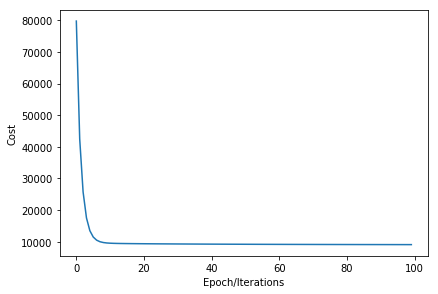

In [38]:
# Plot the variation of loss for each iteration
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<font color="Green"><u>_**Observation:**_</u></font> 
- The final error of this model (5 features) is smaller than the final error of the previous model that means the additional features (number of rooms and polynomial features) help to explain some variance of the price.

### SKlearn Library
we will train our linear model and predict outputs by using predefined functions in 
[**sklearn Library**](http://scikit-learn.org/stable/).  
This library has many classes and modules that are usefull for different problems of machine learning. During this seession, we will use [**Linear Regression**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class from [**Linear Model**](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module.  

**Question 1: **
- Train the linear model with "X" and "y" data.  
**Hint**: use [fit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) function from linear regression class.
- Estimate the price of a house with 330 m² area and 5 rooms.
**Hint**: use [predict]() function from linear regression class

**Question 2: ** Compare coefficients, intercept and performance of the linear model trained with sklearn library and the one trained with gradient descent.

Coefficients:  [[  2.66714891 -20.97206642]]
Intercept:  [222.74748713]
The predicted price of a 330 m² house with 5 rooms is: 998.0462948365729 k€

Mean squared error: 18244.72
Final error =  9122.36049229972
R² score: 0.31


<IPython.core.display.Javascript object>


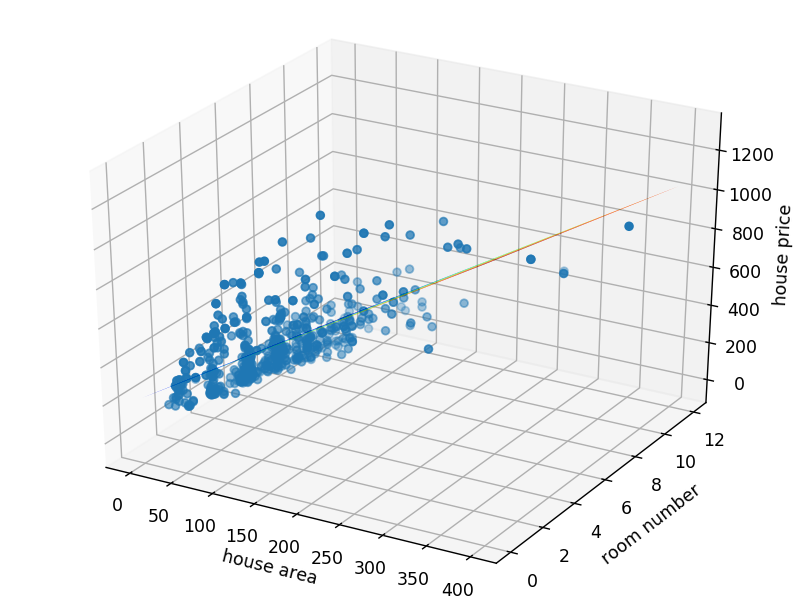

Text(0.5,0,'house price')

In [39]:
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import*
from matplotlib import cm
%matplotlib notebook

house_data = np.loadtxt('house.csv') 

m = house_data.shape[0]         # number of sample
x_1 = house_data[:,0,np.newaxis]
x_2 = house_data[:,1,np.newaxis]

X = np.concatenate((x_1,x_2),axis=1)
n = house_data.shape[0]         # number of features
y = house_data[:,2,np.newaxis]

regr = linear_model.LinearRegression()
# your code here

regr.fit(X,y)
# coefficients and intercept
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

# use the trained model to predict
prediction = regr.predict(X)

area = 330
nbr_room = 5
price = regr.predict(np.array([[area,nbr_room]]))
print("The predicted price of a {0} m² house with {1} rooms is: {2} k€".format(area,nbr_room,price[0,0]))

# mean squared error and R^2 score
print()
print("Mean squared error: %.2f"% mean_squared_error(y, prediction))
print("Final error = ",np.sum((prediction-y)**2)/(2*m))
print('R² score: %.2f' % regr.score(X, y))


fig=plt.figure('Surface plot')
ax=Axes3D(fig)
ax.scatter(x_1,x_2,y)

x1 = np.linspace(0,400,400) 
x2 = np.arange(13)
x1, x2 = np.meshgrid(x1, x2)

X3=np.concatenate((x1[:,:,np.newaxis],x2[:,:,np.newaxis]),axis=-1)
X3bis=X3.reshape((X3.shape[0]*X3.shape[1],X3.shape[2]))
Zbis =  regr.predict(X3bis)
Z=Zbis.reshape((X3.shape[0],X3.shape[1]))

ax.plot_surface(x1,x2,Z,rstride=1,cstride=1,cmap=cm.jet,linewidth=1,antialiased=True)
ax.set_xlabel('house area')
ax.set_ylabel('room number')
ax.set_zlabel('house price')

<font color="Green"><u>_**Observation:**_</u></font>  
- When looking on the 3D plot we note that our model is presented by a plane which is coherent with the linear model (hyperplane in general case).